In [54]:
import geopandas
from datetime import datetime as dt
import matplotlib.pyplot as plot

In [55]:
gdf = geopandas.read_file("../resourses/example_dataset.geojson")
gdf = gdf.to_crs(epsg=32635)

In [56]:
date_format = '%Y-%m-%d'
april_index = 4
field_count = 0

for date_str in gdf['sowing_date'].tolist():
    date = dt.strptime(date_str, date_format)
    
    if date.month != april_index:
        field_count += 1
        
print(f'Кількість полів, які були засіяні не у квітні: {field_count}')

Кількість полів, які були засіяні не у квітні: 421


In [57]:
gdf['relative_mistake'] = abs((gdf['actual_yield'] - gdf['model_yield']) / gdf['actual_yield'])
gdf.head(1)

,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,relative_mistake
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((584923.210 5452025.816, 584932...",0.171447


In [58]:
relative_mistakes_list = gdf['relative_mistake'].tolist()
to_display = ['crop_name', 'sowing_date', 'field_id', 'actual_yield', 'model_yield', 'relative_mistake']

min_index = relative_mistakes_list.index(min(relative_mistakes_list))
max_index = relative_mistakes_list.index(max(relative_mistakes_list))
min_info = gdf.iloc[min_index][to_display].to_string()
max_info = gdf.iloc[max_index][to_display].to_string()

print('Мінімальна відносна похибка: \n' + f'{min_info}\n', end = '\n')
print('Максимальна відносна похибка: \n' + f'{max_info}', end = '\n')

Мінімальна відносна похибка: 
crop_name                     soy
sowing_date            2018-05-09
field_id            KI_VN_10_0702
actual_yield               2600.0
model_yield                2603.0
relative_mistake         0.001154

Максимальна відносна похибка: 
crop_name                   maiz
sowing_date           2017-04-28
field_id            KI_VN_08_405
actual_yield              1500.0
model_yield               6262.0
relative_mistake        3.174667


In [59]:
gdf['centroid'] = gdf['geometry'].centroid
gdf['centroid'] = gdf['centroid'].to_crs(epsg=4326)
gdf['centroid'] = gdf['centroid'].apply(lambda x: f'POINT({x.x}, {x.y})')
gdf.head(1)

,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,relative_mistake,centroid
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((584923.210 5452025.816, 584932...",0.171447,"POINT(28.163550085082857, 49.21292287492776)"


In [60]:
gdf['area'] = gdf.area
gdf.head(1)

,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,relative_mistake,centroid,area
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((584923.210 5452025.816, 584932...",0.171447,"POINT(28.163550085082857, 49.21292287492776)",316556.407843


<Axes: xlabel='avg_temperature', ylabel='actual_yield'>

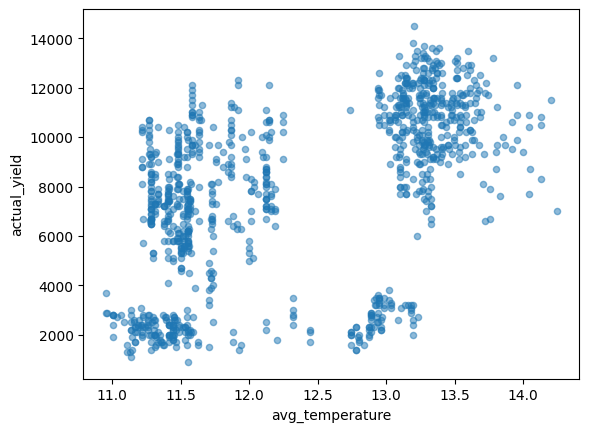

In [61]:
gdf.plot(x='avg_temperature', y='actual_yield', kind='scatter', alpha = 0.5)

<Axes: xlabel='avg_rainfall', ylabel='actual_yield'>

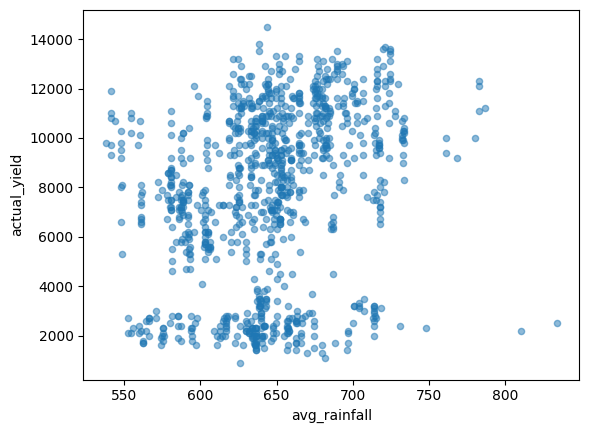

In [62]:
gdf.plot(x='avg_rainfall', y='actual_yield', kind='scatter', alpha = 0.5)

In [63]:
gdf.to_file('../resourses/updated_dataset.geojson')